# GRADTDA5622 - Big Data Computing Foundations II  
### **CRISP-DM: Deployment**  
#### Presenting analytical findings to stakeholders

---  
### Setup for visualization discussion

<ipython-input-26-f113c72c2170>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color="dodgerblue", label="Measured")
<ipython-input-26-f113c72c2170>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color="orange", label="Surveyed")


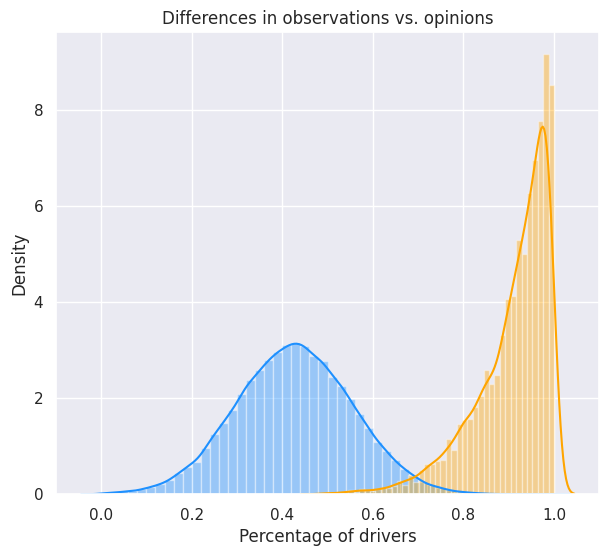

In [26]:
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(42)

x = random.normal(50, 15, 50000)
x_max = max(x)
x = abs(x) / x_max
# print(f'normal: {x[:10]}\n')
# sum(x) / len(x)

y = random.power(10, 5000)
y_max = max(y)
y = abs(y) / y_max
# print(f'log normal: {y[:10]}')
# sum(y) / len(y)

sns.set_theme()
sns.set_style('darkgrid')

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot(x, color="dodgerblue", label="Measured")
sns.distplot(y, color="orange", label="Surveyed")
plt.xlabel('Percentage of drivers')
plt.title('Differences in observations vs. opinions')
# plt.legend()
plt.show()

---  
### Setup for breakout exercise

In [41]:
import pandas as pd

# Read in the dataframe from the course Github repo via common URL
url = 'https://bcoy48.github.io/osu-gradtda-5622-sp25/course_materials/sync_class/'
df = pd.read_csv(url + 'Cleaned_DS_Jobs.csv', encoding='utf-8')

print('Successfully fetched data.')

Successfully fetched data.


In [42]:
# Review the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

In [46]:
# Review the data (transposed)
df.head(3).T

,0,1,2
Job Title,Sr Data Scientist,Data Scientist,Data Scientist
Salary Estimate,137-171,137-171,137-171
Job Description,Description\n\nThe Senior Data Scientist is re...,"Secure our Nation, Ignite your Future\n\nJoin ...",Overview\n\n\nAnalysis Group is one of the lar...
Rating,3.1,4.2,3.8
Company Name,Healthfirst,ManTech,Analysis Group
Location,"New York, NY","Chantilly, VA","Boston, MA"
Headquarters,"New York, NY","Herndon, VA","Boston, MA"
Size,1001 to 5000 employees,5001 to 10000 employees,1001 to 5000 employees
Type of ownership,Nonprofit Organization,Company - Public,Private Practice / Firm
Industry,Insurance Carriers,Research & Development,Consulting


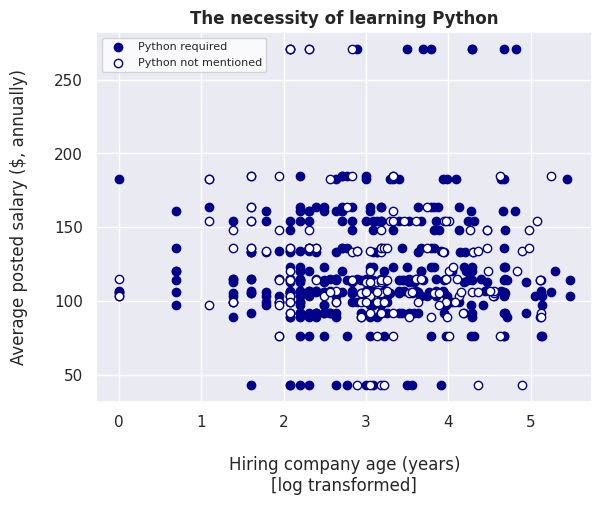

In [78]:
# https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png

import numpy as np

py_y = df[(df.python == 1)]
py_n = df[(df.python != 1)]

plt.scatter(np.log(py_y.company_age), py_y.avg_salary, marker="o", c='darkblue', edgecolors=None, label='Python required')
plt.scatter(np.log(py_n.company_age), py_n.avg_salary, marker="o", c='white', edgecolors='darkblue', label='Python not mentioned')
plt.title('The necessity of learning Python', fontweight='bold')
plt.xlabel('\nHiring company age (years)\n[log transformed]')
plt.ylabel('Average posted salary ($, annually)\n')
plt.legend(loc='upper left', fontsize=8, facecolor='white')
plt.show()